# 1. Подключение библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from google.colab import files
%matplotlib inline

warnings.filterwarnings('ignore')
uploaded = files.upload()

Saving real_estate_dataset.csv to real_estate_dataset.csv


# 2. Загрузка набора данных

In [ ]:
data = pd.read_csv('real_estate_dataset.csv', delimiter=',')
data.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


# 3. Разделение на матрицу признаков и зависимую переменную

In [ ]:
X = data.iloc[:, 1].values
y = data.iloc[:, -1].values
print("Матрица признаков"); print(X[:5])
print("Зависимая переменная"); print(y[:5])

Матрица признаков
[143.63502971 287.6785766  232.99848545 199.66462105  89.00466011]
Зависимая переменная
[602134.81674659 591425.13538622 464478.69687988 583105.65599648
 619879.14252279]


In [ ]:
print(X.shape)
print(y.shape)

(500,)
(500,)


# 4. Разделение выборки на тренировочную и тестовую

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. Обучение модели линейной регрессии

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

regressor = LinearRegression()
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

[495948.00156836 506967.4795178  490291.83478889 678725.41007652
 612907.27620106 510039.7234763  559849.35630949 666141.01042646
 630354.80216248 577626.76309618 680200.60687398 534562.52682514
 688278.09708756 600015.41547497 473200.28522645 524245.44536013
 518915.49035018 611407.56103716 687205.99821977 491106.76494184
 471568.12180691 681804.32847778 677225.92256968 520064.36108771
 615847.06582471 625502.08428104 500342.58982761 669472.75982342
 584976.26222253 578303.61644986 547032.38383933 666647.88069881
 519873.77736612 667676.26947709 485258.21317702 530793.33053409
 486863.20372855 592853.86223302 505519.15427384 612081.78292217
 615333.63820568 538374.67054319 652050.15997385 595041.11845233
 639862.75481241 679490.77424597 519064.21822926 632492.63806817
 618054.59896158 538958.76569124 590029.90688337 619168.92597506
 565347.93291325 532440.62887408 496007.87543618 653371.91312397
 604628.1630377  519555.90615035 528103.78706823 507786.5943402
 548699.86777435 645830.86

In [ ]:
print(X_train.shape)
print(y_train.shape)

(350, 1)
(350,)


In [ ]:
print(X_train[:, 0])

[112.94557396 269.36800338 130.80073301  97.03028993 129.50086874
 123.03616213  68.63766092 202.96322368 207.23571169  95.4562418
 225.49171931 110.99741084 120.23362742 224.18429134 175.65927328
 205.82453171 275.63822667 185.1587804  296.55268612 292.46970668
 173.15627607 141.94578318 292.3256339  285.36620219 195.91402796
  75.36788572 112.56072454 243.78320584 179.07508708 156.05550231
  53.59837216  72.57244251 152.59573076 223.93717225 139.18833167
 149.6261836  271.92604569  70.33719516 187.30666618 168.05373129
  56.33768585 244.28672898 190.31929939 205.72261895  79.70447907
 248.79654869 282.6893314  240.19626215 157.98625466 271.77160607
  59.22173684 109.409386   277.06647149 180.77446104  96.6296276
 189.20031561 248.70282589  72.80152576  85.23105624 117.70806282
 129.23050129 290.61182374 209.10260282  75.28066903 232.99848545
 276.3454941  181.18910791 202.39108349 263.25236387 179.58241309
 201.88621298 208.35093913 291.66370476 177.14267279 273.88080712
 159.7428551

In [ ]:
data.describe()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


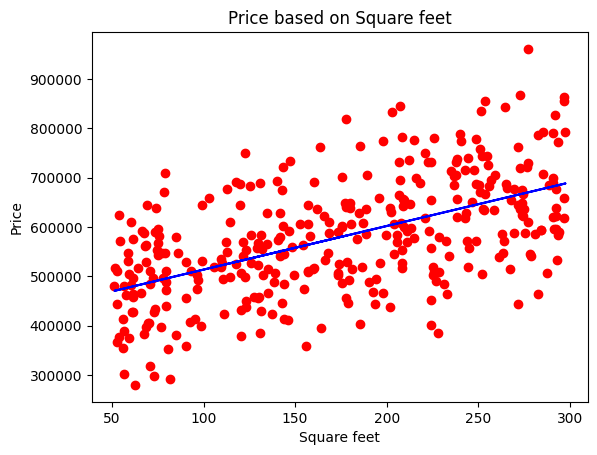

In [ ]:
plt.scatter(X_train[:, 0], y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.xlabel("Square feet")
plt.ylabel("Price")
plt.title("Price based on Square feet")
plt.show()

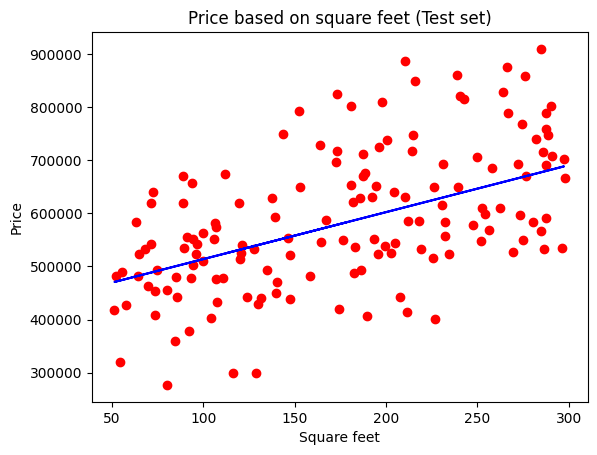

In [ ]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("Price based on square feet (Test set)")
plt.xlabel("Square feet")
plt.ylabel("Price")
plt.show()

# **Контрольные вопросы**

1. Почему при реализации линейной модели регресии нет необходимости выполнять масштабирование признаков?

Линейная модель не чувствительна с точки зрения вычисления коэффициентов

2. Почему при реализации модели линейной регрессии в качестве
функции потерь используется квадратичное отклонение, а не модуль
отклонения?

Квадратичное отклонение чаще используется в линейной регрессии из-за его математической простоты, гладкости и связи с предположении о нормальном распределении ошибок.

3. Что именно реализовано в методе fit(X, y) класса LinearRegression?

*  Добавляет свободный член
*  Вычисляет коэффициенты с помощью аналитического метода
*  Сохраняет параметры модели
*  Проверяет и обрабатывает данные

4. Что такое p-значение? Как p-значение используется при оптимизации
моделей регрессии?

p - значение используется в интерпретируемых моделях в таких моделях как линейная и логистическая регрессия, а также для оценки значимости признаков.

5. Поясните назначение метода predict класса LinearRegression.

Метод predict используется для предсказания значений модели по предоставленной выборке

6. Поясните назначение метода plot и scatter класса pyplot.

plot используется для построения графика с линиями или точками

scatter используется для построения графика с точками

7. По какой подвыборке необходимо оценивать точность модели
машинного обучения: тестовой или тренировочной?

По тестовой выборке